# Final Project Data Exploration

## Andrew Conrad,  Van Mason

### Data Exploration

After scraping our data, we were able to form it into a dataframe.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv('Basketball.csv')
df = df.drop("Unnamed: 0", axis = 1)
df

Name  Win  Loss   W/L%    GB   PS/G   PA/G   SRS  Rank  \
0        Philadelphia 76ers   49    23  0.681   0.0  113.6  108.1  5.28    14   
1             Brooklyn Nets   48    24  0.667   1.0  118.6  114.1  4.24     2   
2           Milwaukee Bucks   46    26  0.639   3.0  120.1  114.2  5.57     1   
3           New York Knicks   41    31  0.569   8.0  107.0  104.7  2.13    26   
4             Atlanta Hawks   41    31  0.569   8.0  113.7  111.4  2.14    11   
..                      ...  ...   ...    ...   ...    ...    ...   ...   ...   
621            Phoenix Suns   51    31  0.622   5.0   94.0   91.8  2.63    17   
622  Portland Trail Blazers   50    32  0.610   6.0   95.4   91.2  4.52    14   
623     Seattle SuperSonics   44    38  0.537  12.0   97.3   97.3  0.55     7   
624    Los Angeles Clippers   31    51  0.378  25.0   92.5   95.3 -2.23    20   
625   Golden State Warriors   17    65  0.207  39.0   92.5  101.5 -8.11    21   

      G  ...   ORB   DRB   TRB   AST  STL  BLK   TOV    PF    PTS  Season  
0    72  ...  10.0  35.0  45.1  23.7  9.1  6.2  14.4  20.2  113.6  2021.0  
1    72  ...   8.9  35.5  44.4  26.8  6.7  5.3  13.5  19.0  118.6  2021.0  
2    72  ...  10.3  37.8  48.1  25.5  8.1  4.6  13.8  17.3  120.1  2021.0  
3    72  ...   9.7  35.5  45.1  21.4  7.0  5.1  12.9  20.5  107.0  2021.0  
4    72  ...  10.6  35.1  45.6  24.1  7.0  4.8  13.2  19.3  113.7  2021.0  
..   ..  ...   ...   ...   ...   ...  ...  ...   ...   ...    ...     ...  
621  82  ...  11.8  30.8  42.7  23.2  9.5  5.2  15.2  22.7   94.0  2001.0  
622  82  ...  11.7  30.3  42.0  23.9  8.2  5.1  15.3  21.3   95.4  2001.0  
623  82  ...  12.2  29.5  41.7  21.9  8.0  5.0  15.3  21.1   97.3  2001.0  
624  82  ...  11.7  31.2  42.9  19.3  6.0  6.3  15.8  21.6   92.5  2001.0  
625  82  ...  16.4  29.1  45.5  21.8  9.0  5.0  15.9  21.1   92.5  2001.0  

[626 rows x 33 columns]

In [4]:
full_columns = df.columns
full_columns

Index(['Name', 'Win', 'Loss', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS', 'Rank', 'G',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Season'],
      dtype='object')

Here we looked at the data through different lenses, to try to get a sense of the model of our data. Here we used histograms to look at the spread of the data throughout the columns.

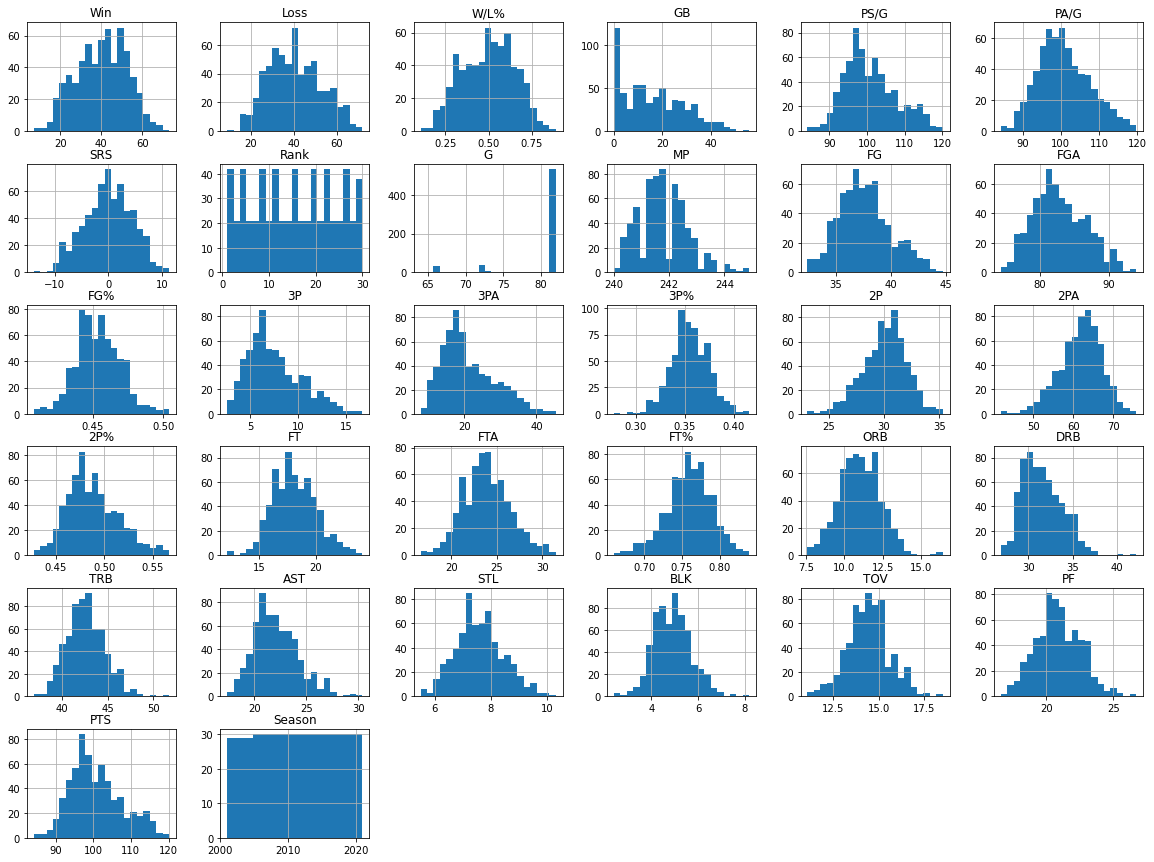

In [5]:
df.hist(bins=21, figsize=(20,15))
plt.show()

Here we looked at the basic correlations with W/L%. We can see that the Win, SRS, and Loss columns have almost 100% correlation with the win ration column, so when analyzing our data later we will drop these columns as they could influence our analysis.

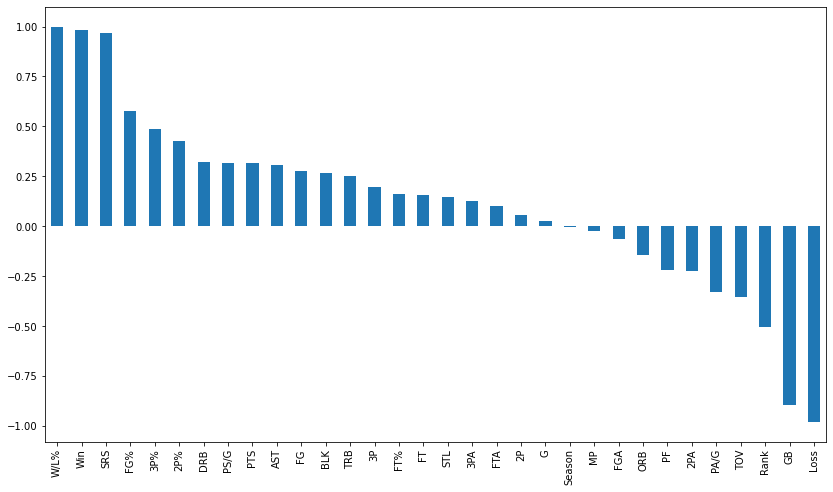

In [7]:
corr = df.corr()
plt.figure(figsize=(14,8))
bars = df.corr()['W/L%'].sort_values(ascending=False).plot(kind='bar')

After getting a sense of our data, we decided to mess around with data splitting to see the relationship between our features and the target column, W/L%.

### Data Splitting

Our first model after only removing name and win columns.

In [8]:
def split(ds):
    X = ds.drop(columns=['W/L%', 'Name', 'Win'])
    y = ds['W/L%'].drop(columns=['Name', 'Win'])
    Xtr, Xva, ytr, yva = train_test_split(X, y, test_size=0.2, random_state=6)
    return (Xtr, Xva, ytr, yva)

In [9]:
Xtrain, Xval, Ytrain, Yval = split(df)
print(Xtrain.shape)
print(Xval.shape)
print(Ytrain.shape)
print(Yval.shape)

(500, 30)
(126, 30)
(500,)
(126,)


In [11]:
reg = sklearn.linear_model.LinearRegression().fit(Xtrain,Ytrain)
print(reg.score(Xtrain,Ytrain))
print(reg.score(Xval, Yval))

0.9971913242335105
0.9969407709675687


After finding a linear regression model with near perfect accuracy, we decided there had to be other features that were significant enough to influence the data. We reduced the scope of our data down to certain features, and cut out other features that may directly influence the win ratio column.

In [13]:
df2 = df[["W/L%", "FG", "FGA", "3P", "3PA", "2P", "2PA", "FT", "FTA", "PTS", "Rank", "ORB", "DRB", "TRB", "STL", "TOV"]]
df2

W/L%    FG   FGA    3P   3PA    2P   2PA    FT   FTA    PTS  Rank   ORB  \
0    0.681  41.4  86.9  11.3  30.1  30.1  56.8  19.6  25.5  113.6    14  10.0   
1    0.667  43.1  87.3  14.2  36.1  29.0  51.2  18.1  22.5  118.6     2   8.9   
2    0.639  44.7  91.8  14.4  37.1  30.3  54.7  16.2  21.4  120.1     1  10.3   
3    0.569  39.4  86.5  11.8  30.0  27.7  56.4  16.4  20.9  107.0    26   9.7   
4    0.569  40.8  87.2  12.4  33.4  28.4  53.9  19.7  24.2  113.7    11  10.6   
..     ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   ...   
621  0.622  35.9  82.4   4.0  12.9  31.9  69.5  18.2  24.1   94.0    17  11.8   
622  0.610  36.6  78.3   4.5  12.9  32.1  65.4  17.6  23.2   95.4    14  11.7   
623  0.537  36.9  81.1   5.7  14.3  31.3  66.8  17.7  24.2   97.3     7  12.2   
624  0.378  35.3  78.9   4.4  13.0  30.9  65.9  17.4  25.1   92.5    20  11.7   
625  0.207  35.8  87.5   3.4  11.8  32.4  75.7  17.4  24.7   92.5    21  16.4   

      DRB   TRB  STL   TOV  
0    35.0  45.1  9.1  14.4  
1    35.5  44.4  6.7  13.5  
2    37.8  48.1  8.1  13.8  
3    35.5  45.1  7.0  12.9  
4    35.1  45.6  7.0  13.2  
..    ...   ...  ...   ...  
621  30.8  42.7  9.5  15.2  
622  30.3  42.0  8.2  15.3  
623  29.5  41.7  8.0  15.3  
624  31.2  42.9  6.0  15.8  
625  29.1  45.5  9.0  15.9  

[626 rows x 16 columns]

Here we set up our variables for linear regression, using X as our main dataframe and Y as the target column.

In [15]:
X = df2.drop(columns=['W/L%'])
Y = df2['W/L%']
columns = X.columns
X = preprocessing.scale(X)
X = pd.DataFrame(X, columns = columns)
X

FG       FGA        3P       3PA        2P       2PA        FT  \
0    1.623876  1.055612  1.359754  1.214134  0.023481 -0.932441  0.770301   
1    2.347578  1.159611  2.407726  2.023672 -0.534079 -1.990053 -0.008376   
2    3.028710  2.329606  2.480000  2.158595  0.124856 -1.329045 -0.994699   
3    0.772461  0.951612  1.540439  1.200642 -1.193013 -1.007984 -0.890875   
4    1.368452  1.133611  1.757261  1.659380 -0.838202 -1.480133  0.822212   
..        ...       ...       ...       ...       ...       ...       ...   
621 -0.717514 -0.114383 -1.278244 -1.106541  0.935852  1.466074  0.043536   
622 -0.419519 -1.180378 -1.097559 -1.106541  1.037227  0.691750 -0.267934   
623 -0.291807 -0.452381 -0.663916 -0.917649  0.631729  0.956154 -0.216023   
624 -0.972938 -1.024379 -1.133696 -1.093048  0.428980  0.786180 -0.371758   
625 -0.760085  1.211611 -1.495066 -1.254956  1.189289  2.637003 -0.371758   

          FTA       PTS      Rank       ORB       DRB       TRB       STL  \
0    0.626681  1.875738 -0.163553 -0.770158  1.530029  1.205009  1.769634   
1   -0.535352  2.610051 -1.558116 -1.596476  1.755086  0.864517 -1.050368   
2   -0.961431  2.830346 -1.674330 -0.544799  2.790349  2.664260  0.594633   
3   -1.155103  0.906443  1.231010 -0.995518  1.755086  1.205009 -0.697868   
4    0.123133  1.890424 -0.512194 -0.319439  1.575040  1.448218 -0.697868   
..        ...       ...       ...       ...       ...       ...       ...   
621  0.084399 -1.002772  0.185088  0.581999 -0.360451  0.037608  2.239635   
622 -0.264211 -0.797164 -0.163553  0.506879 -0.585508 -0.302884  0.712133   
623  0.123133 -0.518125 -0.977048  0.882478 -0.945599 -0.448809  0.477133   
624  0.471743 -1.223066  0.533729  0.506879 -0.180405  0.134891 -1.872869   
625  0.316806 -1.223066  0.649942  4.037511 -1.125645  1.399576  1.652134   

          TOV  
0   -0.035263  
1   -0.817445  
2   -0.556718  
3   -1.338899  
4   -1.078172  
..        ...  
621  0.660009  
622  0.746918  
623  0.746918  
624  1.181463  
625  1.268373  

[626 rows x 15 columns]

After basic splitting, this regression score seemed much more resonable then the 0.99 we were getting earlier. 

In [16]:
Xtr, Xva, ytr, yva = train_test_split(X, Y, test_size=0.4, random_state=6)
reg = sklearn.linear_model.LinearRegression().fit(Xtr,ytr)
print(reg.score(Xtr,ytr))
print(reg.score(Xva,yva))

0.840958384610791
0.8292822750967598


In [17]:
Y_pred = reg.predict(Xtr)
mean_squared_error(ytr, Y_pred, squared = False)

0.06173628153301047

0.840958384610791


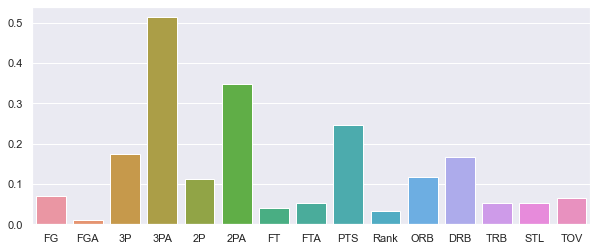

In [18]:
reg = sklearn.linear_model.LinearRegression().fit(Xtr,ytr)
print(reg.score(Xtr,ytr))
sns.set(rc={'figure.figsize':(10,4)})
plot3 = sns.barplot(x = columns, y = np.absolute(reg.coef_))

From the above graph, we can clearly see a couple features whose coefficients are particularly high, such as 3PA, 2PA, and PTS. These categories could be the highest influencer on win rate, which we will look at further in our notebook discussing final analysis. Below is more exploration we did with data looking at the current year values, and seeing what the distributions of coefficents looked like for those years. 

In [19]:
current_year = df[df["Season"].isin([2019, 2018])]
current_year_short = current_year[["W/L%", "FG", "FGA", "3P", "3PA", "2P", "2PA", "FT", "FTA", "PTS", "ORB", "DRB", "TRB", "STL", "TOV"]]
current_year_short

W/L%    FG   FGA    3P   3PA    2P   2PA    FT   FTA    PTS   ORB   DRB  \
60   0.732  43.4  91.1  13.5  38.2  29.9  52.9  17.9  23.2  118.1   9.3  40.4   
61   0.707  42.2  89.1  12.4  33.8  29.8  55.3  17.7  22.0  114.4   9.6  35.6   
62   0.622  41.5  88.2  10.8  30.2  30.7  58.0  21.2  27.5  115.2  10.9  36.9   
63   0.598  42.1  90.5  12.6  34.5  29.5  56.0  15.6  19.5  112.4   9.8  34.7   
64   0.585  41.3  87.0   9.5  25.4  31.8  61.6  15.8  21.1  108.0   9.3  33.7   
65   0.512  40.3  89.7  12.8  36.2  27.5  53.6  19.0  25.5  112.2  11.0  35.6   
66   0.512  40.4  89.1  11.4  32.1  29.0  57.0  15.0  19.2  107.3  10.0  35.4   
67   0.500  38.8  88.3  12.1  34.8  26.7  53.5  17.3  23.1  107.0  11.4  33.6   
68   0.476  40.2  89.8  11.9  33.9  28.3  55.8  18.4  23.1  110.7   9.9  33.9   
69   0.476  39.6  88.0  11.3  32.4  28.3  55.6  15.1  21.7  105.7  11.2  35.1   
70   0.390  42.1  90.1  11.3  33.3  30.8  56.8  18.4  23.9  114.0   9.7  32.7   
71   0.354  41.4  91.8  13.0  37.0  28.4  54.8  17.6  23.4  113.3  11.6  34.5   
72   0.268  39.8  87.9   9.1  25.9  30.7  62.0  16.2  20.7  104.9   8.8  34.1   
73   0.232  38.9  87.6  10.3  29.1  28.6  58.5  16.4  20.7  104.5  10.7  31.9   
74   0.207  38.2  88.3  10.0  29.5  28.2  58.8  18.1  23.9  104.6  10.5  34.3   
75   0.695  44.0  89.8  13.3  34.4  30.8  55.3  16.3  20.4  117.7   9.7  36.5   
76   0.659  41.9  90.0  11.0  31.4  30.9  58.7  15.8  20.9  110.7  11.9  34.5   
77   0.646  42.3  90.6  11.0  30.7  31.3  59.8  19.0  23.3  114.7  11.8  36.2   
78   0.646  39.2  87.4  16.1  45.4  23.1  42.0  19.3  24.4  113.9  10.2  31.9   
79   0.610  40.4  86.4  12.1  34.0  28.3  52.4  18.8  25.5  111.7  10.0  36.4   
80   0.598  42.6  94.0  11.4  32.6  31.3  61.3  17.8  25.0  114.5  12.6  35.5   
81   0.585  42.3  88.4   9.9  25.3  32.4  63.1  17.2  21.0  111.7   9.2  35.5   
82   0.585  41.3  87.5  10.0  25.8  31.3  61.7  22.6  28.5  115.1   9.7  35.8   
83   0.476  43.2  93.1  11.3  29.9  31.9  63.2  16.5  22.7  114.2  11.0  34.4   
84   0.451  42.6  90.5  10.3  31.0  32.2  59.6  16.3  23.3  111.8  10.2  36.4   
85   0.439  41.6  91.3  10.1  28.7  31.5  62.5  19.1  24.3  112.5  11.3  33.5   
86   0.402  38.0  84.4   9.9  28.9  28.1  55.6  17.7  23.0  103.5   8.8  33.0   
87   0.402  43.7  92.2  10.3  29.9  33.4  62.4  17.8  23.4  115.4  11.1  36.2   
88   0.402  38.8  86.9  12.5  36.6  26.3  50.2  18.8  25.3  108.9  10.1  35.2   
89   0.232  40.1  87.4   9.6  29.3  30.5  58.1  17.6  22.7  107.5   9.1  31.3   
90   0.720  41.3  87.4  11.8  33.0  29.5  54.4  17.3  21.8  111.7   9.8  34.2   
91   0.671  38.3  85.1  11.5  30.4  26.9  54.7  16.0  20.7  104.0   9.4  35.1   
92   0.634  40.8  86.6  11.0  29.8  29.9  56.7  17.1  22.8  109.8  10.9  36.5   
93   0.610  40.4  84.8  12.0  32.1  28.4  52.6  18.1  23.3  110.9   8.5  33.7   
94   0.585  40.8  86.4   9.0  24.5  31.8  61.9  14.9  19.2  105.6   9.6  32.7   
95   0.537  38.8  85.3  11.0  30.6  27.8  54.8  14.7  19.5  103.4   9.3  34.2   
96   0.537  39.7  83.0   8.8  24.7  31.0  58.3  18.3  23.4  106.5   8.4  31.5   
97   0.524  39.9  85.6   9.9  26.5  30.0  59.1  16.8  21.8  106.6  10.0  33.1   
98   0.476  39.1  86.9  10.8  28.9  28.3  58.0  14.7  19.8  103.8  10.1  33.6   
99   0.439  39.0  86.7  10.0  27.2  28.9  59.4  20.2  27.0  108.2  10.1  35.4   
100  0.354  40.7  87.7   8.2  23.3  32.5  64.4  14.9  19.0  104.5  10.5  33.6   
101  0.341  38.2  86.8  12.7  35.7  25.5  51.1  17.4  22.6  106.6   9.7  34.8   
102  0.329  38.7  88.8  11.0  31.1  27.6  57.8  14.6  19.2  102.9   9.6  35.0   
103  0.305  38.8  85.9  10.3  29.3  28.5  56.5  15.5  20.5  103.4   8.8  32.8   
104  0.293  38.2  85.5  11.2  31.0  27.0  54.5  15.8  20.2  103.4   9.1  32.8   
105  0.793  38.7  84.2  15.3  42.3  23.4  41.9  19.6  25.1  112.4   9.0  34.5   
106  0.707  42.8  85.1  11.3  28.9  31.5  56.2  16.6  20.3  113.5   8.4  35.1   
107  0.598  39.3  87.0  10.3  28.1  29.0  58.8  16.7  20.9  105.6  10.2  35.3   
108  0.585  39.9  88.1  10.7  30.4  2

In [21]:
X = current_year_short.drop(columns=['W/L%'])
Y = current_year_short['W/L%']
columns = X.columns
#scale features for coefficent later
X = preprocessing.scale(X)
X = pd.DataFrame(X, columns = columns)
Xtr, Xva, ytr, yva = train_test_split(X, Y, test_size=0.2, random_state=6)
reg = sklearn.linear_model.LinearRegression().fit(Xtr,ytr)
print(reg.score(Xtr,ytr))
print(reg.score(Xva,yva))

0.9323922102546203
0.8555703876387655


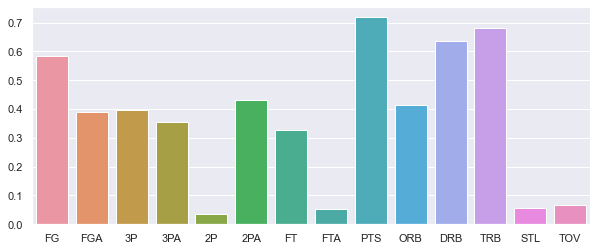

In [22]:
sns.set(rc={'figure.figsize':(10,4)})
plot3 = sns.barplot(x = columns, y = np.absolute(reg.coef_))

The biggest issue with looking at yearly trends is the smaller amount of data. Instead of looking at specific years we spread our scope out over the years.